# Data Profiling: Sparkov Dataset


Import statements

In [1]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt

Load data:

In [2]:
register_matplotlib_converters()
df = pd.concat([pd.read_csv('../../data/raw/fraudTrain.csv'), pd.read_csv('../../data/raw/fraudTest.csv')], ignore_index=True)

In [3]:
df['cc_num'].value_counts()

cc_num
6538441737335434       4392
30270432095985         4392
6538891242532018       4386
4364010865167176       4386
4642255475285942       4386
                       ... 
4714017207228610634       7
4352307151555405069       7
180097223252063           7
6011732631674654          7
4295296907373             6
Name: count, Length: 999, dtype: int64

In [4]:
df['merchant'].value_counts()

merchant
fraud_Kilback LLC                        6262
fraud_Cormier LLC                        5246
fraud_Schumm PLC                         5195
fraud_Kuhn LLC                           5031
fraud_Boyer PLC                          4999
                                         ... 
fraud_Douglas, DuBuque and McKenzie      1101
fraud_Treutel-King                       1098
fraud_Satterfield-Lowe                   1095
fraud_Hahn, Douglas and Schowalter       1091
fraud_Ritchie, Bradtke and Stiedemann    1090
Name: count, Length: 693, dtype: int64

In [5]:
df['category'].value_counts()

category
gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: count, dtype: int64

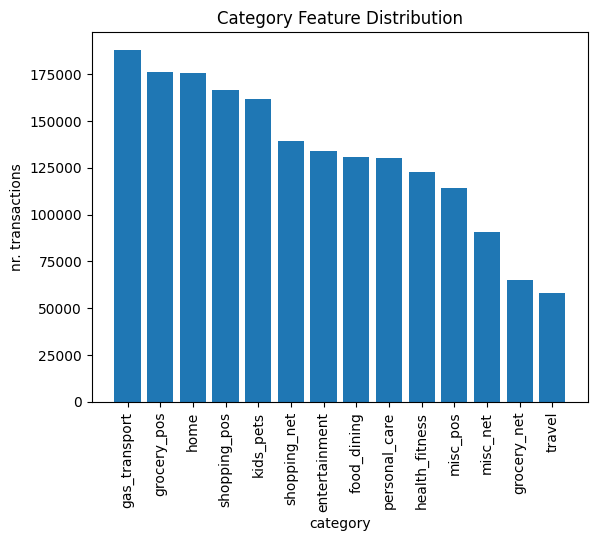

In [33]:

plt.bar(df['category'].value_counts().index.tolist(), 
         df['category'].value_counts().tolist())
plt.xticks(rotation='vertical')
plt.xlabel('category')
plt.ylabel('nr. transactions')
plt.title('Category Feature Distribution')
plt.savefig(f"../../../image_results/category_distribution.png", format='png')
plt.show()

In [36]:
df['cc_num'].astype(str).value_counts().index.tolist()

['6538441737335434',
 '30270432095985',
 '6538891242532018',
 '4364010865167176',
 '4642255475285942',
 '6011438889172900',
 '344709867813900',
 '4904681492230012',
 '4586810168620942',
 '4512828414983801773',
 '4745996322265',
 '36722699017270',
 '6534628260579800',
 '180048185037117',
 '342952484382519',
 '3560797065840735',
 '3553629419254918',
 '213112402583773',
 '3583635130604947',
 '6011504998544485',
 '6011367958204270',
 '3575789281659026',
 '372509258176510',
 '6011652924285713',
 '376445266762684',
 '180094419304907',
 '345933964507467',
 '4836998673805450',
 '2242542703101233',
 '372520049757633',
 '630424987505',
 '4908846471916297',
 '6011893664860915',
 '30273037698427',
 '3596217206093829',
 '3566094707272327',
 '571365235126',
 '2720433095629877',
 '630451534402',
 '3551217896304745',
 '4587657402165341815',
 '2712209726293386',
 '3590736522064285',
 '213141712584544',
 '3521417320836166',
 '30238755902988',
 '6011109736646996',
 '3576431665303017',
 '4716561796955522'

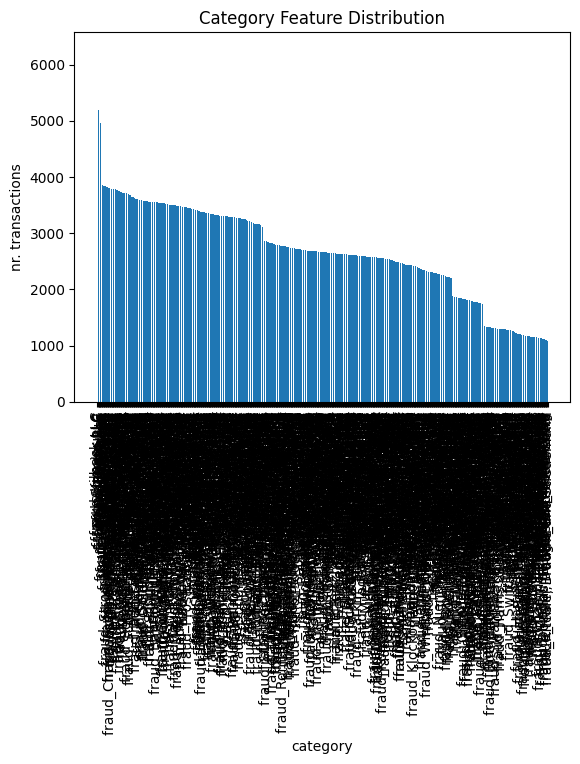

In [38]:
plt.bar(df['merchant'].astype(str).value_counts().index.tolist(), 
         df['merchant'].value_counts().tolist())
plt.xticks(rotation='vertical')
plt.xlabel('category')
plt.ylabel('nr. transactions')
plt.title('Category Feature Distribution')
plt.savefig(f"../../../image_results/cc_num_distribution.png", format='png')
plt.show()

In [5]:
len(df['category'].unique())

693

In [24]:
train['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [5]:
total = 1296675
neg = 1289169
pos = 7506

weight_0 = (1 / neg) * (total / 2.0)
weight_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_0, 1: weight_1}

print('Weight for class 0: {:.2f}'.format(weight_0))
print('Weight for class 1: {:.2f}'.format(weight_1))
print(class_weight)

Weight for class 0: 0.50
Weight for class 1: 86.38
{0: 0.5029111776656124, 1: 86.37589928057554}


Get frequency of customers in the dataset:

In [19]:
train['cc_num'].nunique()

983

Get the number of transactions each customer has in the dataset:

In [20]:
train['cc_num'].value_counts().to_numpy()

array([3123, 3123, 3119, 3117, 3113, 3112, 3110, 3107, 3106, 3101, 3099,
       3095, 3090, 3090, 3088, 3087, 3083, 3082, 3081, 3080, 3077, 3074,
       3074, 3072, 3071, 3064, 3061, 3056, 3055, 3054, 3051, 3046, 3045,
       3040, 3039, 3038, 3034, 3032, 3030, 3027, 3027, 3026, 3026, 3023,
       3011, 3006, 2973, 2949, 2949, 2922, 2918, 2918, 2915, 2619, 2611,
       2603, 2602, 2599, 2597, 2591, 2590, 2588, 2587, 2587, 2585, 2585,
       2584, 2582, 2578, 2578, 2577, 2576, 2574, 2573, 2572, 2572, 2572,
       2570, 2568, 2566, 2566, 2565, 2564, 2564, 2564, 2564, 2562, 2562,
       2562, 2562, 2561, 2559, 2558, 2558, 2556, 2555, 2555, 2554, 2554,
       2553, 2553, 2552, 2551, 2548, 2547, 2541, 2540, 2540, 2539, 2534,
       2530, 2530, 2527, 2525, 2525, 2524, 2524, 2523, 2521, 2519, 2503,
       2498, 2458, 2456, 2109, 2107, 2106, 2102, 2101, 2097, 2093, 2092,
       2091, 2090, 2090, 2089, 2088, 2087, 2087, 2087, 2083, 2082, 2080,
       2080, 2080, 2080, 2075, 2075, 2074, 2074, 20

- This dataset has a lot more credit card frequency than any other we have seen so far. 
- The variable **type** is a good candidate to be used as the shared state

This is a really good sign to use it as a dataset for the recurrent models

In [21]:
test = pd.read_csv('../../datasets/raw/fraudTest.csv')
test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [25]:
test['is_fraud'].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

In [22]:
test['cc_num'].nunique()

924

Get the number of transactions each customer has in the dataset:

In [23]:
test['cc_num'].value_counts().to_numpy()

array([1474, 1466, 1462, 1458, 1428, 1426, 1403, 1386, 1375, 1358, 1354,
       1352, 1350, 1346, 1343, 1340, 1339, 1336, 1334, 1332, 1325, 1325,
       1325, 1324, 1324, 1319, 1317, 1314, 1308, 1302, 1301, 1300, 1298,
       1297, 1293, 1293, 1292, 1291, 1291, 1289, 1285, 1279, 1277, 1275,
       1271, 1270, 1268, 1267, 1264, 1263, 1261, 1251, 1251, 1188, 1187,
       1151, 1143, 1137, 1135, 1134, 1129, 1129, 1126, 1124, 1119, 1117,
       1116, 1112, 1112, 1109, 1107, 1105, 1105, 1101, 1099, 1099, 1098,
       1097, 1097, 1096, 1095, 1094, 1094, 1094, 1093, 1092, 1092, 1091,
       1090, 1090, 1088, 1088, 1088, 1086, 1086, 1084, 1083, 1082, 1081,
       1079, 1079, 1079, 1076, 1075, 1074, 1074, 1074, 1073, 1072, 1072,
       1071, 1070, 1067, 1066, 1060, 1057, 1055, 1054, 1053, 1049, 1046,
       1045, 1042, 1036,  963,  944,  929,  923,  921,  920,  920,  918,
        912,  911,  909,  909,  907,  906,  906,  905,  905,  905,  902,
        901,  901,  901,  900,  900,  900,  900,  8